In [18]:
from tensorflow import keras 
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

In [7]:
def model_fn(a_layer = None) :
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer :
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [8]:
model = model_fn()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 5, verbose = 0)

In [10]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


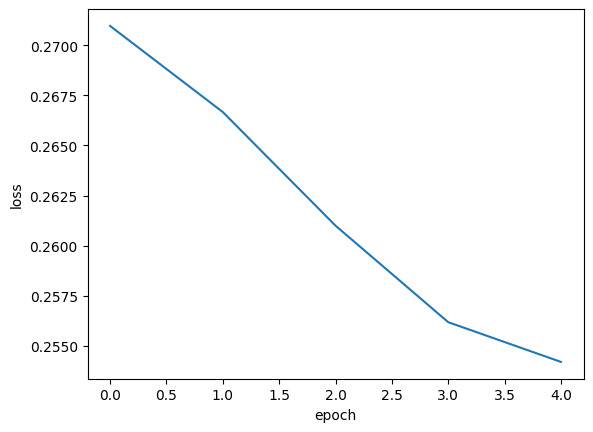

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

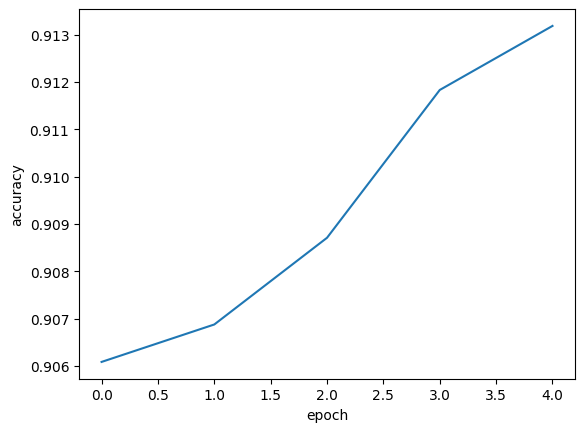

In [14]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

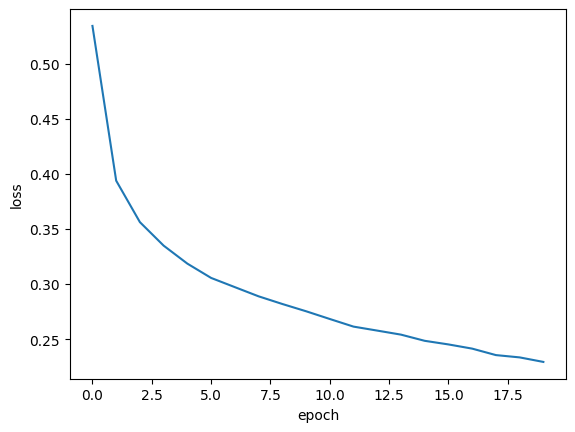

In [15]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [19]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')
history= model.fit(train_scaled, train_target, epochs = 20, verbose= 0, validation_data=(val_scaled, val_target))

In [21]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


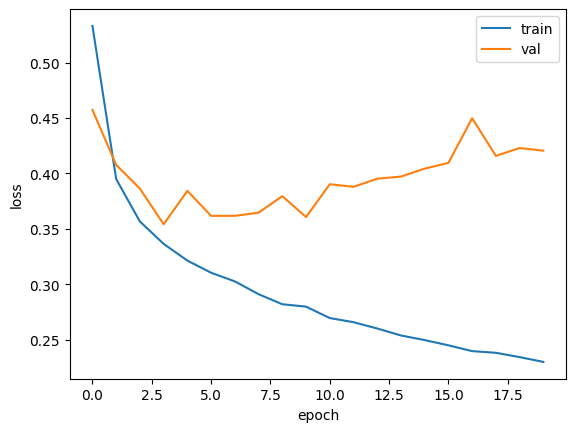

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

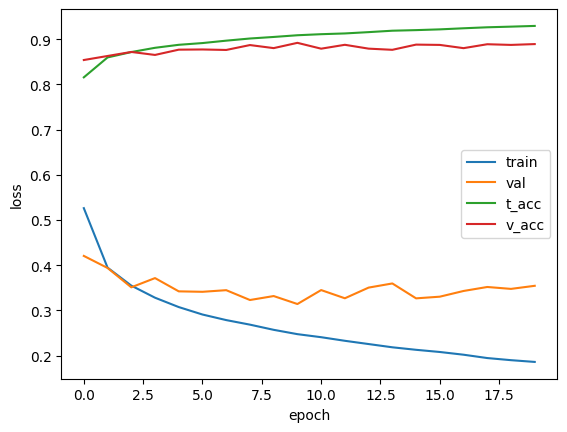

In [30]:
model = model_fn()
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val','t_acc', 'v_acc'])
plt.show()

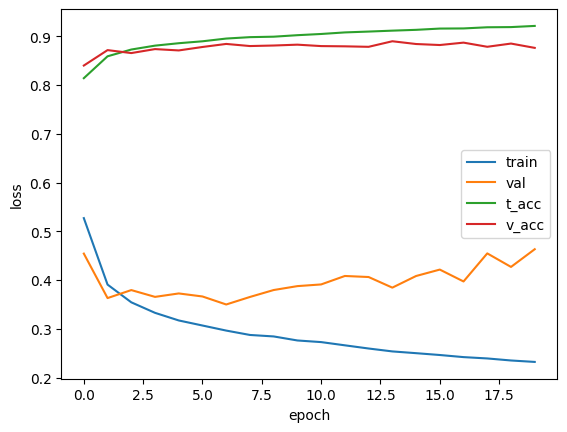

In [29]:
model = model_fn()
model.compile(optimizer = 'RMSprop', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val','t_acc', 'v_acc'])
plt.show()

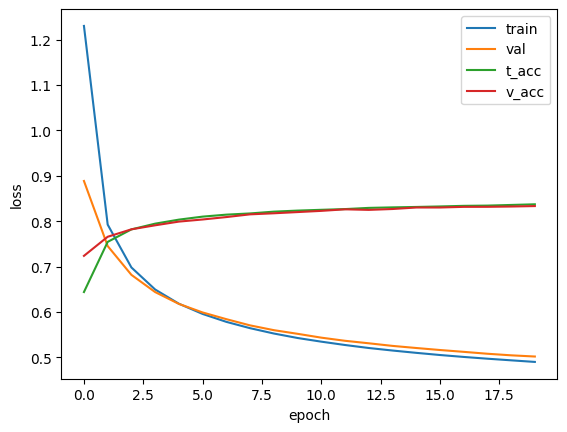

In [28]:
model = model_fn()
model.compile(optimizer = 'Adagrad', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val','t_acc', 'v_acc'])
plt.show()

In [31]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


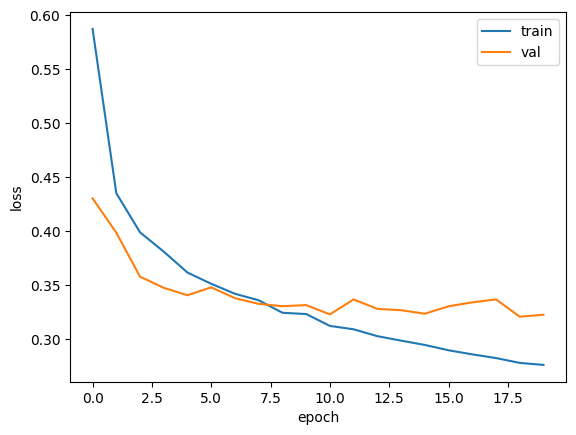

In [32]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

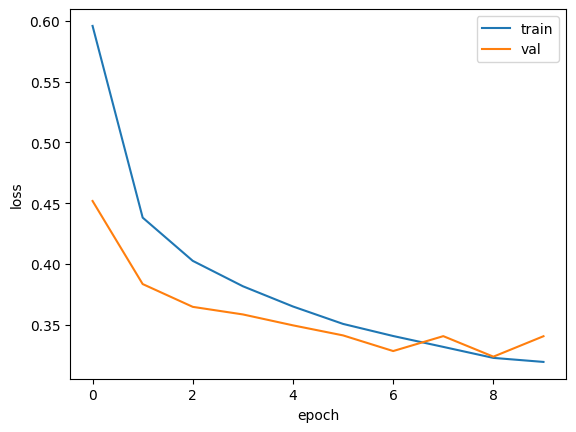

In [33]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 10, verbose = 0, validation_data = (val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [34]:
model.save_weights('model-weights.h5')
model.save('model-whole.h5')

In [37]:
ls -asl *.h5

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 6A9B-8AF2

 C:\Users\ltm75\Python_Deep_Learning 디렉터리


 C:\Users\ltm75\Python_Deep_Learning 디렉터리

2024-01-04  오후 10:05           332,480 model-weights.h5
2024-01-04  오후 10:05           981,776 model-whole.h5
               2개 파일           1,314,256 바이트
               0개 디렉터리  49,393,975,296 바이트 남음


In [38]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [39]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis = -1)
print(np.mean(val_labels == val_target))

0.8773333333333333


In [42]:
model = keras.models.load_model('model-whole.h5')
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = 'accuracy')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3407 - accuracy: 0.8773


[0.3407003879547119, 0.8773333430290222]

In [43]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only = True)
model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target), callbacks=[checkpoint_cb])

In [45]:
model = keras.models.load_model('best-model.h5')
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3155 - accuracy: 0.8853


[0.3155384361743927, 0.8853333592414856]

In [49]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

In [50]:
print(early_stopping_cb.stopped_epoch)

8


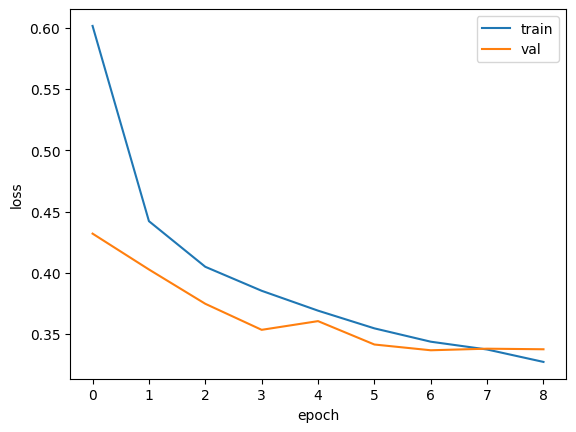

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [52]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3368 - accuracy: 0.8777


[0.33681532740592957, 0.8777499794960022]